# Dağılım Grafikleri
### Barplot 

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# veri setine hızlı bir göz atalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df.cut.value_counts() # kategorik değişkenlerin sınıflarına bakalım

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
df.color.value_counts() # kategorik değişkenlerin sınıflarına bakalım

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
df.clarity.value_counts() # kategorik değişkenlerin sınıflarına bakalım

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [7]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [9]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True)) # sıralı değişken tanımlama

In [10]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [11]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [12]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [13]:
df.cut = df.cut.astype(CategoricalDtype(
    ordered=True, categories=cut_categories))  # sıralı değişken tanımlama


In [14]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [15]:
color_categories = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(
    ordered=True, categories=color_categories))  # sıralı değişken tanımlama


In [16]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [17]:
clarity_categories = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df["clarity"] = df["clarity"].astype(CategoricalDtype(
    ordered=True, categories=clarity_categories))  # ordered categorical variable


In [18]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

# barplot

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

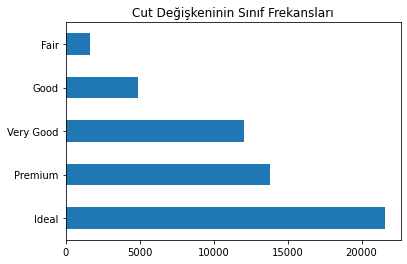

In [20]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

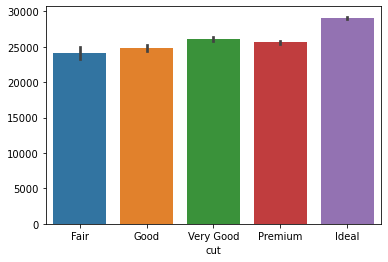

In [21]:
sns.barplot(x="cut", y=df.cut.index, data=df);


### çaprazlamalar


In [22]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


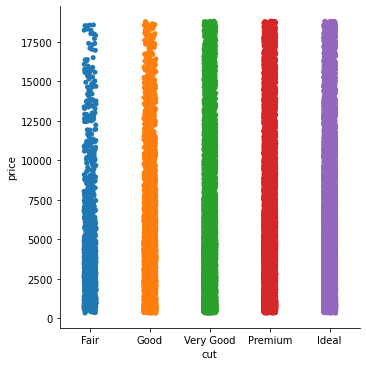

In [23]:
# kategorik değişkenlerin sınıf frekanslarına bakalım
sns.catplot(x = "cut", y = "price", data = df);

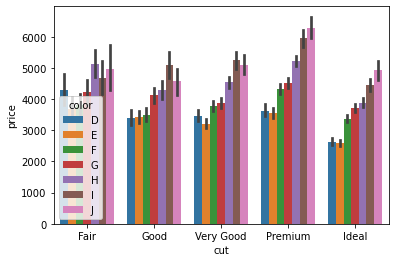

In [24]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df); # hue ile parametreleri gruplayabiliriz

In [25]:
df.groupby(["cut", "color"])["price"].mean() # gruplama işlemi

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# Histogramplot

In [26]:
import seaborn as sns
diamond = sns.load_dataset('diamonds')
df = diamond.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


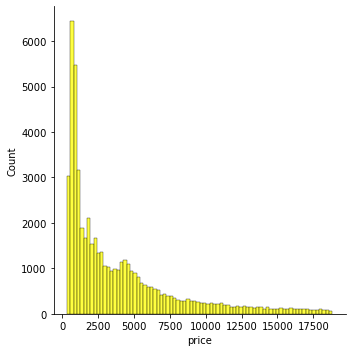

In [27]:
sns.displot(df.price, kde = False, color="yellow"); # kde = False ile yoğunluk çizgisi çizilmez

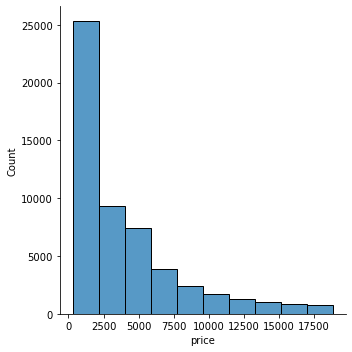

In [28]:
sns.displot(df.price, bins= 10, kde = False); 

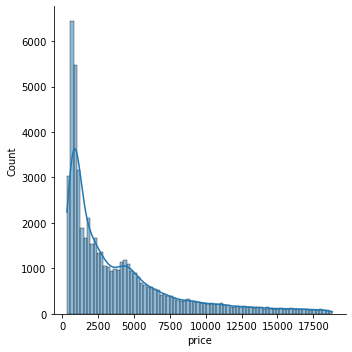

In [29]:
sns.displot(df.price, kde= True); # kde = True ile yoğunluk çizgisi çizilir

In [30]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

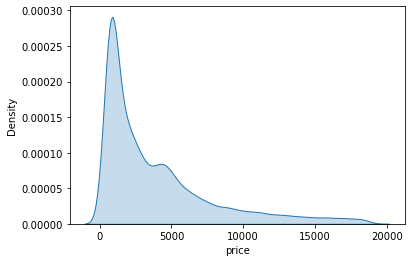

In [31]:
sns.kdeplot(df.price, fill=True); # shade = True ile yoğunluk çizgisi altı doldurulur

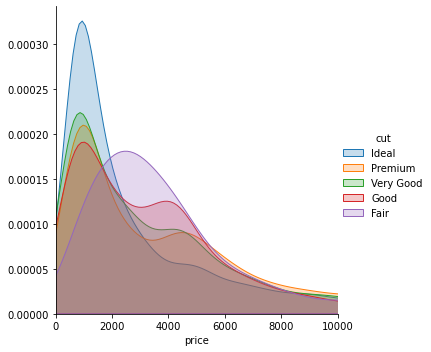

In [32]:
(sns.FacetGrid(df,
               hue = "cut",
               height = 5,
               xlim = (0, 10000))
.map(sns.kdeplot, "price", shade = True)
.add_legend()
); 

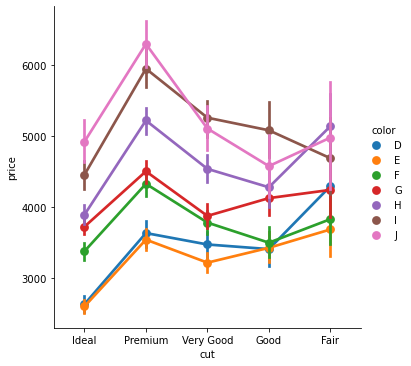

In [33]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [ ]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df, capsize = 0.2);